In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
stack_overflow = pd.read_feather(r"C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\28_Hypothesis_Testing_in_Python\datasets\stack_overflow.feather")
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


### Hypotheses
H0 : The mean compensation (in USD) is the same for those that coded first as a child and
those that coded first as an adult.

- H0 : μ(child) = μ(adult)
- H0 : μ(child) − μ(adult) = 0

Ha : The mean compensation (in USD) is greater for those that coded first as a child
compared to those that coded first as an adult.

- Ha : μ(child) > μ(adult)
- Ha : μ(child) − μ(adult) > 0

### Calculating groupwise summary statistics

In [3]:
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

### Calculations assuming the null hypothesis is true

In [4]:
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()

In [5]:
s['child']

255585.2401149758

In [6]:
#Calculating the test statistic

numerator = xbar['child'] - xbar['adult']
denominator = np.sqrt(s['child'] ** 2 / n['child'] + s['adult'] ** 2 / n['adult'])
t_stat = numerator / denominator
t_stat

1.8699313316221844

### Hypothesis testing workflow

1. Identify population parameter that is hypothesized about.
2. Specify the null and alternative hypotheses.
3. Determine (standardized) test statistic and corresponding null distribuition.
4. Conduct hypothesis test in Python.
5. Measure evidence against the null hypothesis.
6. Make a decision comparing evidence to significance level.
7. Interpret the results in the context of the original problem.

### Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t".

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. 

In [7]:
late_shipments = pd.read_feather(r"C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\28_Hypothesis_Testing_in_Python\datasets\late_shipments.feather")
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [8]:
xbar = late_shipments.groupby('late')['weight_kilograms'].mean()

xbar_yes = xbar['Yes']
xbar_no = xbar['No']

s = late_shipments.groupby('late')['weight_kilograms'].std()

s_yes = s['Yes']
s_no = s['No']

n = late_shipments.groupby('late')['weight_kilograms'].count()

n_yes = n['Yes']
n_no = n['No']

In [9]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


### Time for  t

#### Hypotheses
H0 : The mean compensation (in USD) is the same for those that coded rst as a child and
those that coded rst as an 

Ha : The mean compensation (in USD) is greater for those that coded rst as a child
compared to those that coded rst as an adult

Use a **right-tailed test**


#### Significance level
α = 0.1
If p ≤ α then reject H0.

    z-statistic: needed when using one sample statistic to estimate a population parameter
    t-statistic: needed when using multiple sample statistics to estimate a population parameter

In [10]:
#Calculating p-values: to means from different groups

xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()

xbar_child = xbar['child']
xbar_adult = xbar['adult']

s_child = s['child']
s_adult = s['adult']


n_child = n['child']
n_adult = n['adult']

#Calculating the test statistic

numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator
t_stat

1.8699313316221844

In [11]:
# o -2 é pq conhecemos duas estatísticas amostrais, as médias para cada grupo
degrees_of_freedom = n_child + n_adult - 2
degrees_of_freedom

2259

In [12]:
from scipy.stats import t

p_value = 1 - t.cdf(t_stat, df=degrees_of_freedom)
p_value

0.030811302165157595

Evidence that Stack Overow data scientists who started coding as a child earn more

Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

### From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

H0: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

Ha: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

It's a Left-tailed test.

In [13]:
xbar = late_shipments.groupby('late')['weight_kilograms'].mean()

xbar_yes = xbar['Yes']
xbar_no = xbar['No']

s = late_shipments.groupby('late')['weight_kilograms'].std()

s_yes = s['Yes']
s_no = s['No']

n = late_shipments.groupby('late')['weight_kilograms'].count()

n_yes = n['Yes']
n_no = n['No']

# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Calculate the degrees of freedom
degrees_of_freedom = n_yes + n_no - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

alpha = 0.05

# Print the p_value
print(p_value)

0.008432382146249523


In [14]:
p_value <= alpha

True

Reject the null hypothesis.

### Pairing is caring

In [15]:
repub_votes_potus_08_12 = pd.read_feather(r"C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\28_Hypothesis_Testing_in_Python\datasets\repub_votes_potus_08_12.feather")
repub_votes_potus_08_12.head()
#each row represents county-level votes in a presidential election.

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


#### Hypotheses

Question: Was the percentage of Republican candidate votes lower in 2008 than 2012?

- H0 : μ2008 − μ2012 = 0
- Ha : μ2008 − μ2012 < 0

Set α = 0.05 signicance level.

<AxesSubplot:>

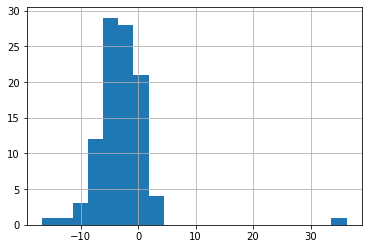

In [16]:
#From two samples to one
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

sample_data['diff'].hist(bins=20)

In [17]:
#Calculate sample statistics of the difference

xbar_diff = sample_data['diff'].mean()
xbar_diff

-2.8771090412429454

### Revised hypotheses

#### New hypotheses:

- H0 : μdiff = 0
- Ha : μdiff < 0

In [18]:
#Calculating the p-value

n_diff = len(sample_data)
n_diff

100

In [19]:
s_diff =sample_data['diff'].std()
t_stat = (xbar_diff-0)/np.sqrt(s_diff**2/n_diff)
t_stat

-5.601043121928492

In [20]:
degrees_of_freedom = n_diff - 1

In [21]:
p_value = t.cdf(t_stat,df=degrees_of_freedom)
p_value

9.572537285272304e-08

!pip install pingouin

In [23]:
#Testing differences between two means using ttest()

import pingouin

pingouin.ttest(x=sample_data['diff'], #valor da hipotese nula
               y = 0, #valor da hipotese alternativa
               alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


In [24]:
pingouin.ttest(x=sample_data['repub_percent_08'],
               y = sample_data['repub_percent_12'],
               paired = True,
               alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [25]:
pingouin.ttest(x=sample_data['repub_percent_08'],
               y = sample_data['repub_percent_12'],
               paired = False,# The default
               alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


Unpaired t-tests on paired data increases the chances of false negative errors

### Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

In [27]:
dem_votes_potus_12_16 = pd.read_feather(r"C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\28_Hypothesis_Testing_in_Python\datasets\dem_votes_potus_12_16.feather")
dem_votes_potus_12_16.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


<AxesSubplot:>

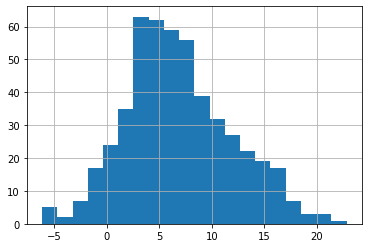

In [31]:
# Calculate the differences from 2012 to 2016
sample_dem_data = dem_votes_potus_12_16
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

sample_dem_data['diff'].hist(bins=20)

In [32]:
# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()
xbar_diff

6.829312660106832

In [33]:
# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()
s_diff

5.040139140132316

In [38]:
# Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".

# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], #valor da hipotese nula
               y = 0, #valor da hipotese alternativa
               alternative='two-sided')

test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


In [40]:
test_results['p-val'] <= 0.01
#Reject the null hypothesis

T-test    True
Name: p-val, dtype: bool

In [41]:
sample_dem_data.columns

Index(['state', 'county', 'dem_percent_12', 'dem_percent_16', 'diff'], dtype='object')

In [44]:
#Conduct a paired test on the democratic votes in 2012 and 2016 (the dem_percent_12 and dem_percent_16 columns of sample_dem_data), using an appropriate alternative hypothesis.

paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
               y = sample_dem_data['dem_percent_16'],
               paired = True,
               alternative='two-sided')
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


In [46]:
teste = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], 
               alternative="two-sided")

In [47]:
paired_test_results['p-val'] < teste['p-val']

T-test    True
Name: p-val, dtype: bool

### Visualizing multiple distributions
Is mean annual compensation dierent for diferent levels of job satisfaction?

- Para casos com mais de dois grupos

<AxesSubplot:xlabel='converted_comp', ylabel='job_sat'>

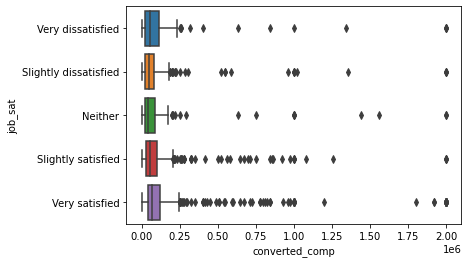

In [48]:
import seaborn as sns

sns.boxplot(x = 'converted_comp',
            y = 'job_sat',
            data = stack_overflow)

In [49]:
alpha = 0.2

In [50]:
pingouin.anova(data=stack_overflow,
               dv = 'converted_comp',
               between = 'job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [51]:
#Pairwise test, teste com combinacao de pares 
pingouin.pairwise_ttests(data=stack_overflow,
               dv = 'converted_comp',
               between = 'job_sat',
               padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


In [52]:
#Bonferroni correction, para reduzirmos as chances de falsos positivos
pingouin.pairwise_ttests(data=stack_overflow,
               dv = 'converted_comp',
               between = 'job_sat',
               padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


### Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

In [56]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [57]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


<AxesSubplot:xlabel='pack_price', ylabel='shipment_mode'>

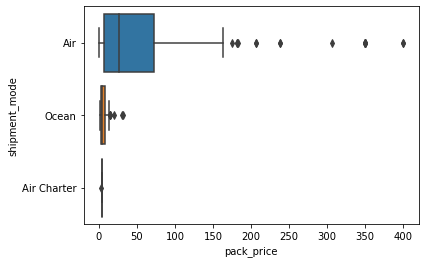

In [58]:
# Create a boxplot from late_shipments with "pack_price" as x and "shipment_mode" as y.

sns.boxplot(data = late_shipments,
            x = 'pack_price',
            y = 'shipment_mode')

### ANOVA
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

H0: Pack prices for every category of shipment mode are the same.

Ha: Pack prices for some categories of shipment mode are different.

We'll set a significance level of 0.1.

In [61]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                      dv = 'pack_price',
                      between = 'shipment_mode')



# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


Assuming a significance level of 0.1, should you reject the null hypothesis that there is a difference between pack prices between the shipment modes?

In [63]:
alpha = 0.1

In [65]:
anova_results['p-unc'] <= alpha

0    True
Name: p-unc, dtype: bool

Yes. The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.

### Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

In [67]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
# Perform pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment.
pairwise_results = pingouin.pairwise_ttests(data=late_shipments,
               dv = 'pack_price',
               between = 'shipment_mode',
               padjust='none') 




# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


In [68]:
# Modify the pairwise t-tests to use the Bonferroni p-value adjustment.

pairwise_results = pingouin.pairwise_ttests(data=late_shipments,
               dv = 'pack_price',
               between = 'shipment_mode',
               padjust='bonf') 




# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?

"Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air".